<a href="https://colab.research.google.com/github/MustafaHusain942/Green-AI-Projects/blob/main/Air_Quality_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, pair_confusion_matrix

In [ ]:
df = pd.read_csv('/content/air quality data.csv')

In [ ]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN


In [ ]:
df.tail()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0
29530,Visakhapatnam,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0


In [ ]:
df.shape

(29531, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   PM2.5    24933 non-null  float64
 2   PM10     18391 non-null  float64
 3   NO       25949 non-null  float64
 4   NO2      25946 non-null  float64
 5   NOx      25346 non-null  float64
 6   NH3      19203 non-null  float64
 7   CO       27472 non-null  float64
 8   SO2      25677 non-null  float64
 9   O3       25509 non-null  float64
 10  Benzene  23908 non-null  float64
 11  Toluene  21490 non-null  float64
 12  Xylene   11422 non-null  float64
 13  AQI      24850 non-null  float64
dtypes: float64(13), object(1)
memory usage: 3.2+ MB


In [ ]:
df.head(10)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN
5,Ahmedabad,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN
6,Ahmedabad,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN
7,Ahmedabad,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN
8,Ahmedabad,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN
9,Ahmedabad,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN


In [ ]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [ ]:
df.axes

[RangeIndex(start=0, stop=29531, step=1),
 Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
        'Benzene', 'Toluene', 'Xylene', 'AQI'],
       dtype='object')]

In [ ]:
df.isnull().sum().sum()

83807

In [ ]:
df.isnull().sum()

,0
City,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854
O3,4022


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df.duplicated().sum()

2297

In [ ]:
df1 = df.dropna(subset=['AQI'], inplace = True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [ ]:
df.shape

(24850, 14)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [ ]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

,0
Xylene,61.859155
PM10,28.515091
NH3,26.301811
Toluene,23.444668
Benzene,14.225352
NOx,7.472837
O3,3.247485
PM2.5,2.728370
SO2,2.434608
CO,1.790744


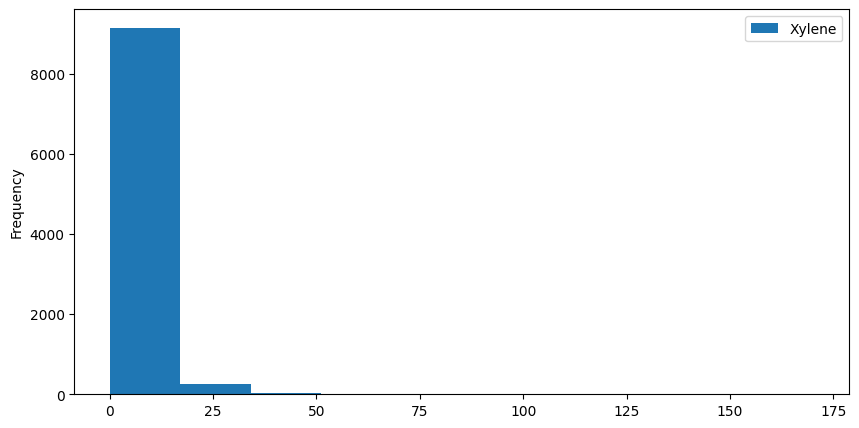

In [ ]:
df['Xylene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

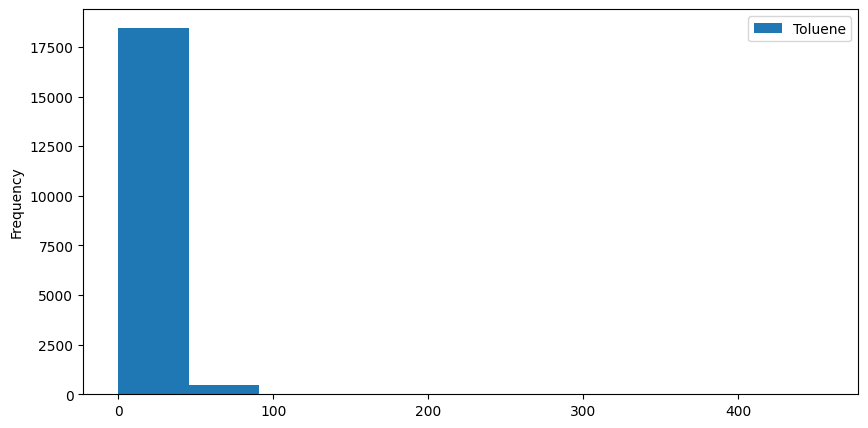

In [ ]:
df['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

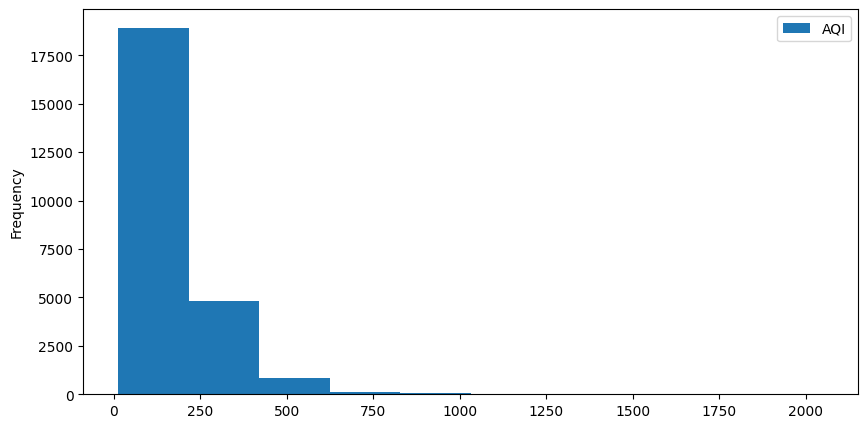

In [ ]:
df['AQI'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

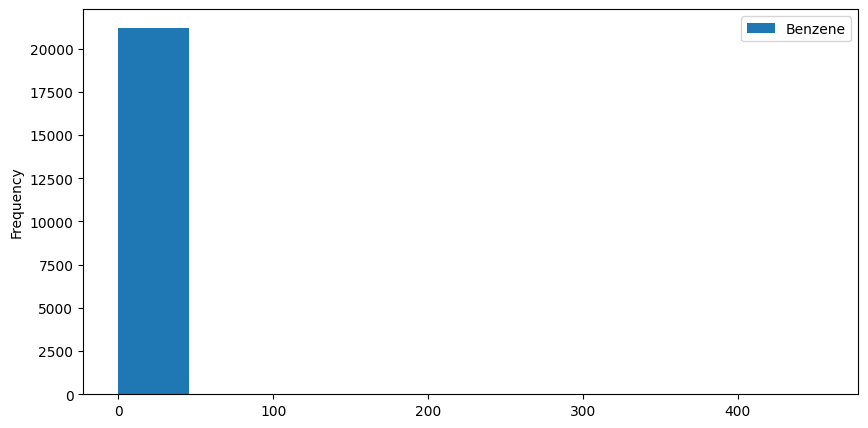

In [ ]:
df['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

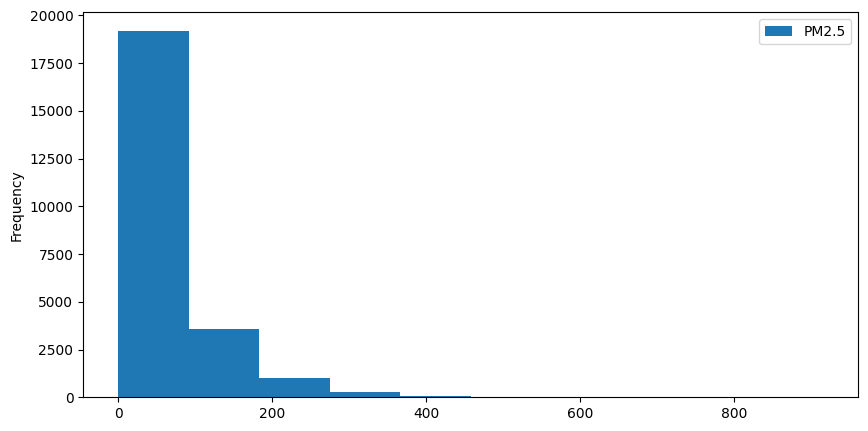

In [ ]:
df['PM2.5'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

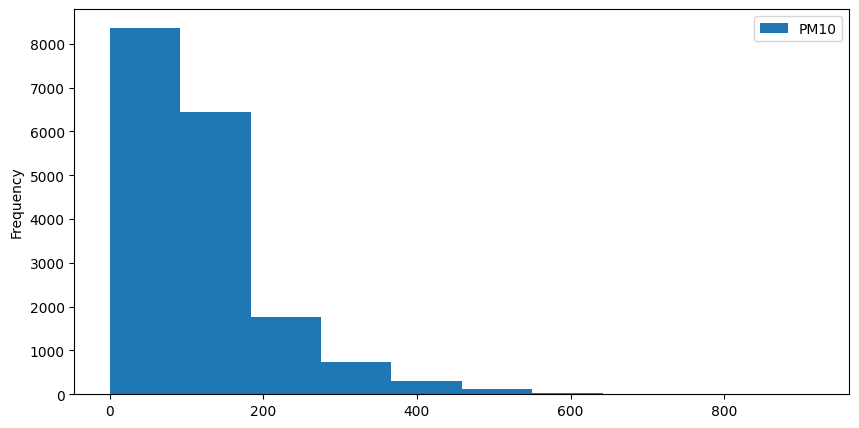

In [ ]:
df['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

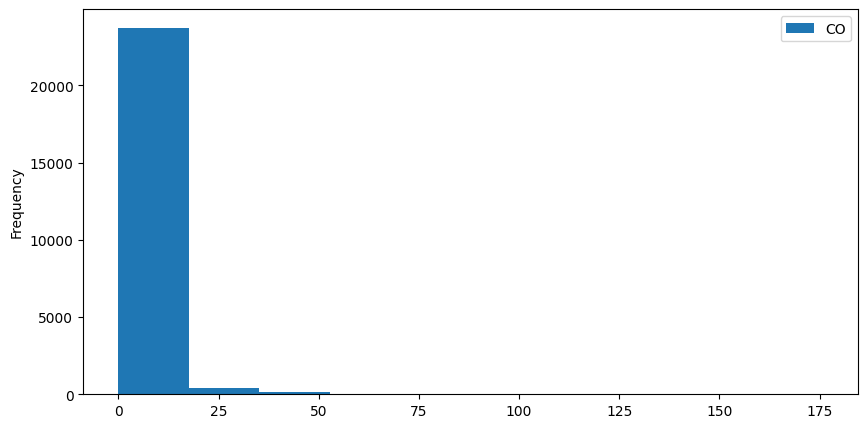

In [ ]:
df['CO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

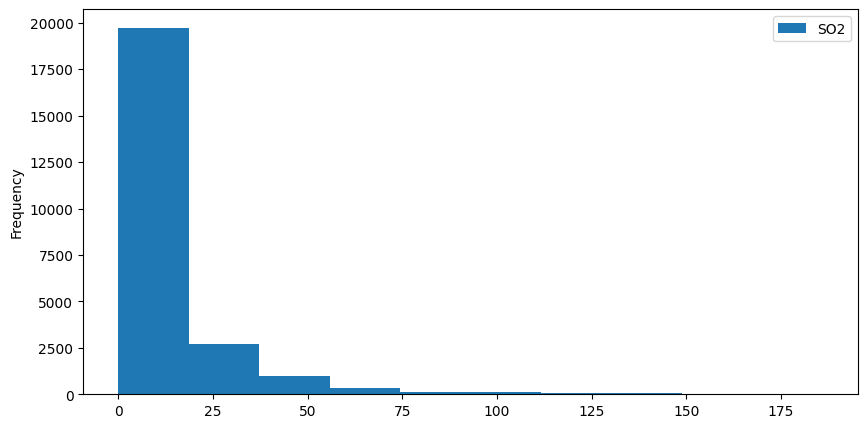

In [ ]:
df['SO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

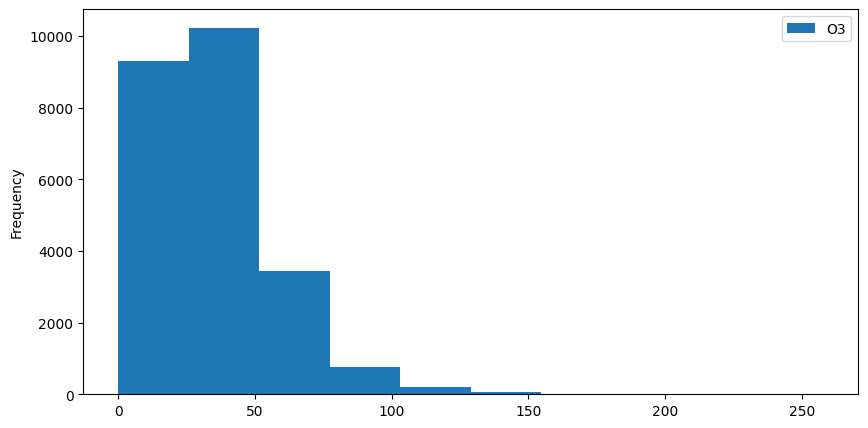

In [ ]:
df['O3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

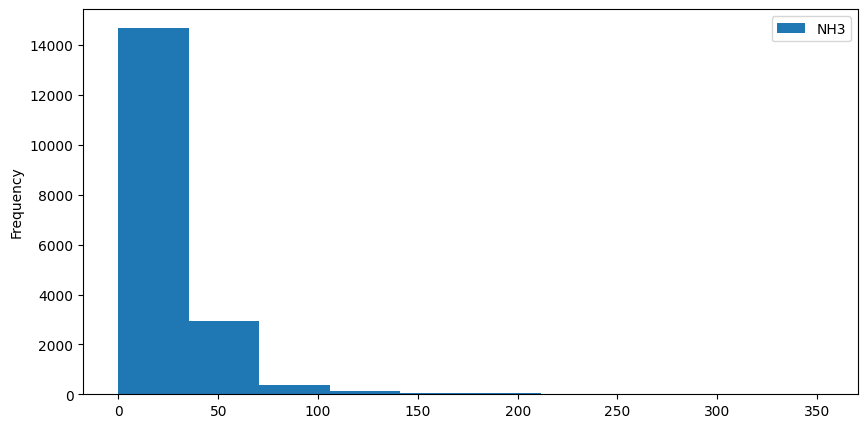

In [ ]:
df['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

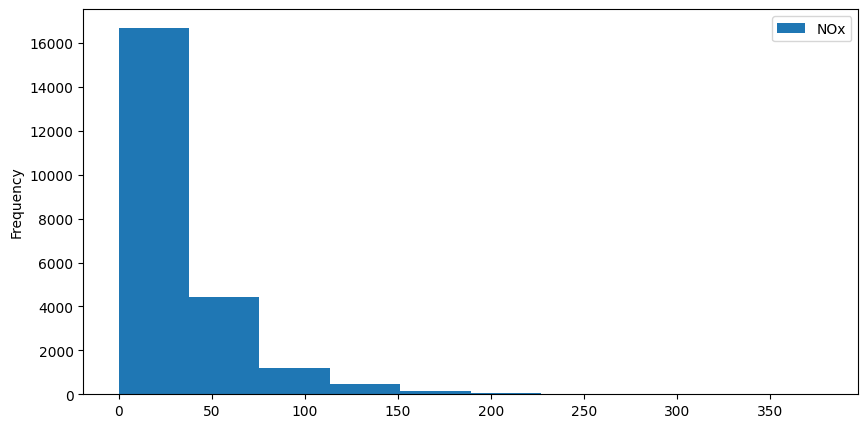

In [ ]:
df['NOx'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

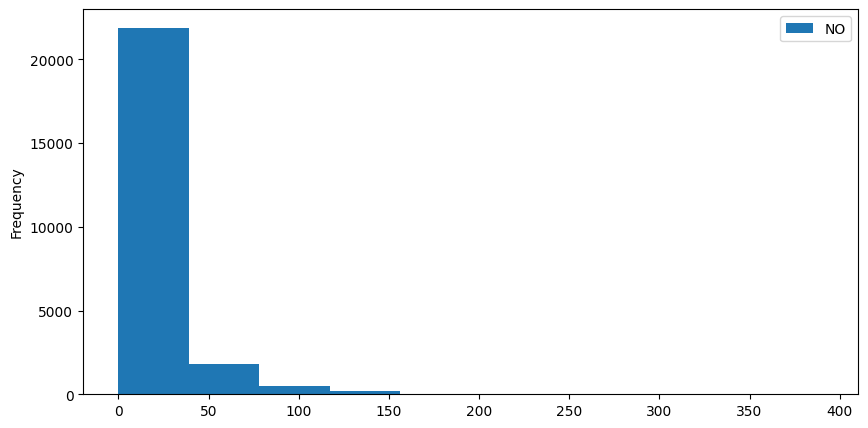

In [ ]:
df['NO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

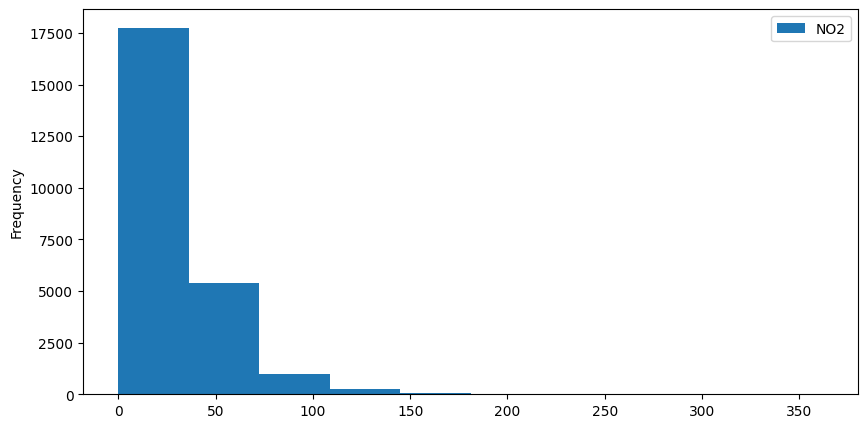

In [ ]:
df['NO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

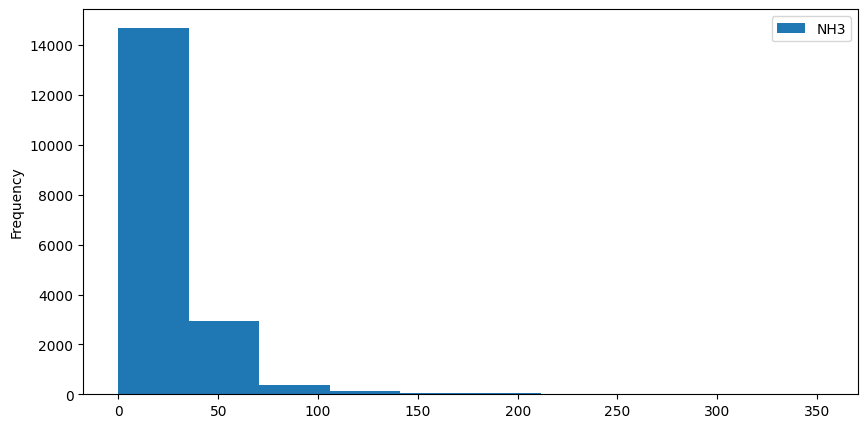

In [ ]:
df['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

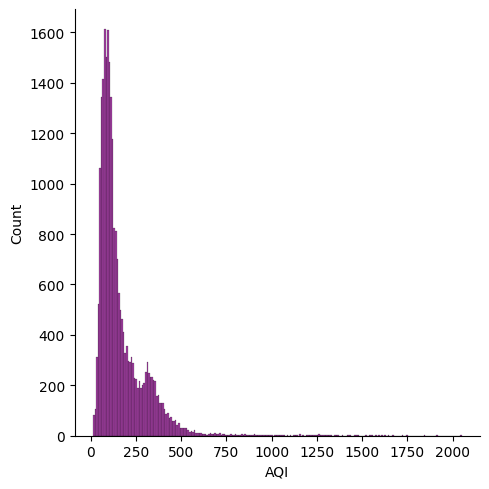

In [ ]:
sns.displot(df, x="AQI", color="purple")
plt.show()

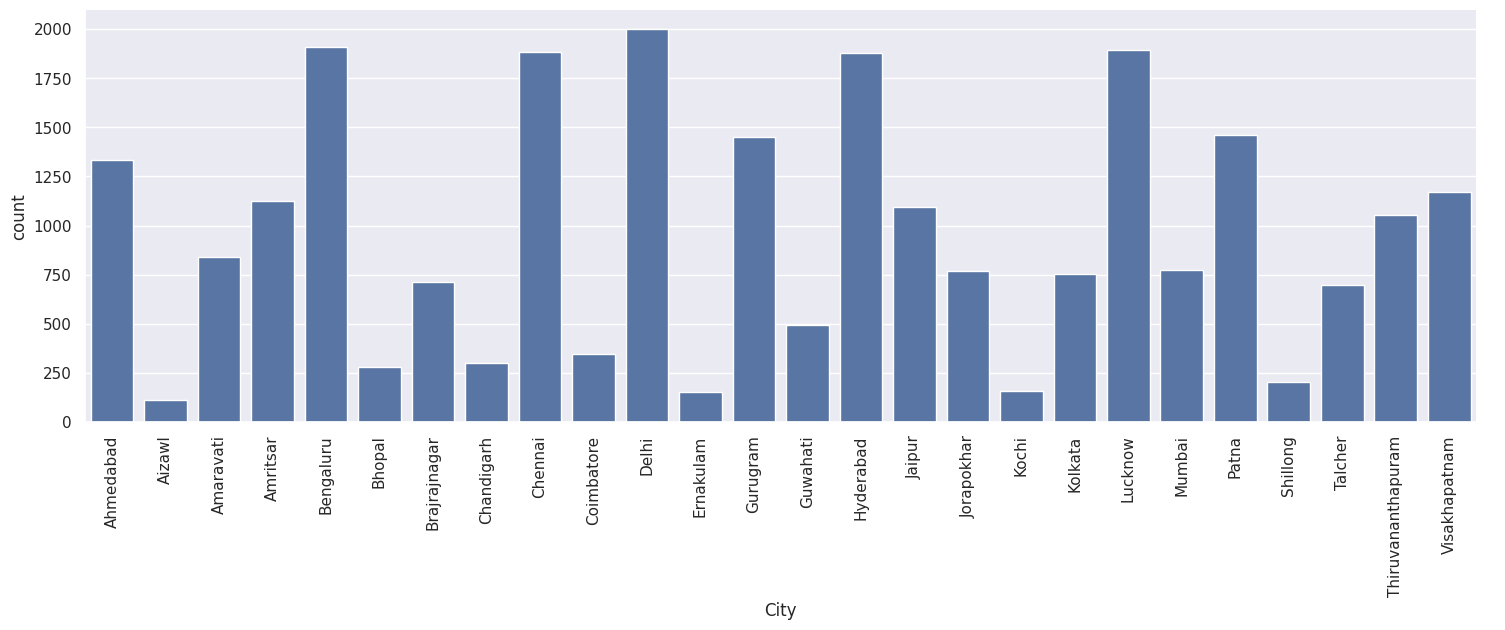

In [ ]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City", kind="count", data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

In [ ]:
df.describe().loc["mean"]

,mean
PM2.5,67.476613
PM10,118.454435
NO,17.622421
NO2,28.978391
NOx,32.289012
NH3,23.848366
CO,2.345267
SO2,14.362933
O3,34.912885
Benzene,3.458668


In [ ]:
df.describe().loc["std"]

,std
PM2.5,63.075398
PM10,89.487976
NO,22.421138
NO2,24.627054
NOx,30.712855
NH3,25.875981
CO,7.075208
SO2,17.428693
O3,21.724525
Benzene,16.036020


In [ ]:
df = df.replace({
    "PM2.5" : {np.nan:67.476613},
    "PM10" : {np.nan:118.454435},
    "NO" : {np.nan:17.622421},
    "NOx" : {np.nan:32.289012},
    "NH3" : {np.nan:23.848366},
    "CO" : {np.nan:2.34567},
    "SO2" : {np.nan:34.912885},
    "O3" : {np.nan:38.320547},
    "Benzene" : {np.nan:16.036020},
    "Toluene" : {np.nan:20.881085},
    "Xylene" : {np.nan:6.754324},
    "NO2" : {np.nan:28.978391},
}

)

In [ ]:
df.isnull().sum()

,0
City,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0


<Axes: >

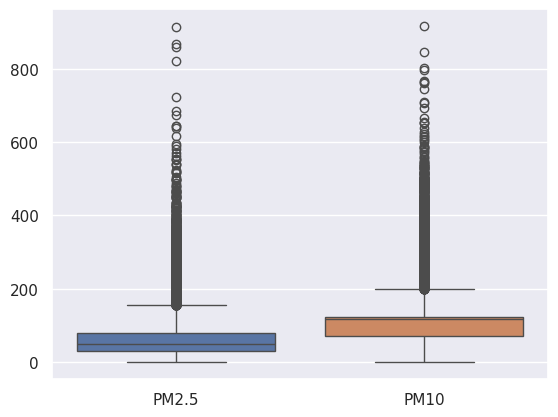

In [ ]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

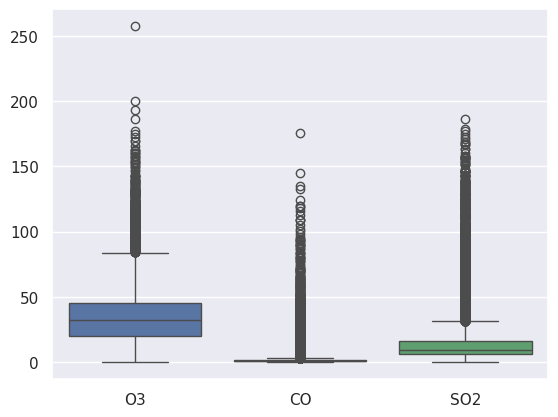

In [ ]:
sns.boxplot(data=df[['O3', 'CO', 'SO2']])

<Axes: >

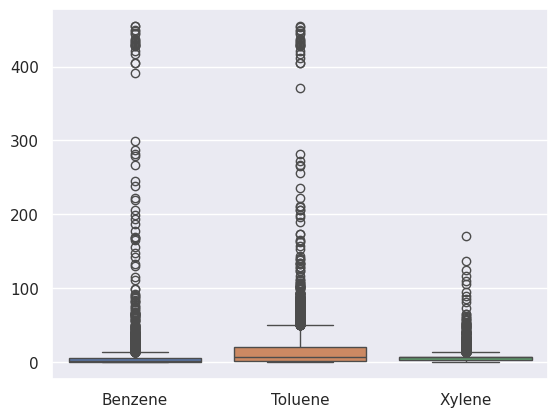

In [ ]:
sns.boxplot(data=df[['Benzene', 'Toluene', 'Xylene']])

In [ ]:
def replace_outliers_with_quartiles(df):
  for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(
        lambda x: Q1 if x< lower_bound else (Q3 if x > upper_bound else x)
    )
    return df
    df = replace_outliers_with_quartiles(df)


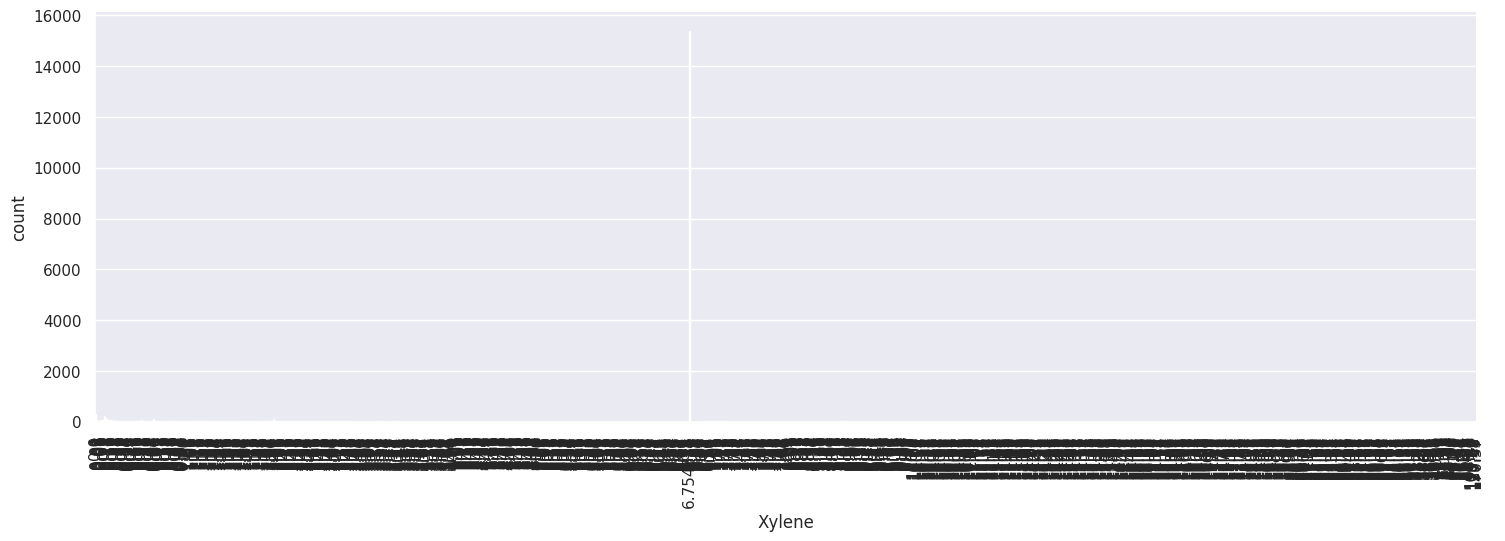

In [ ]:
sns.set(style="darkgrid")
graph=sns.catplot(x="Xylene", kind="count", data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

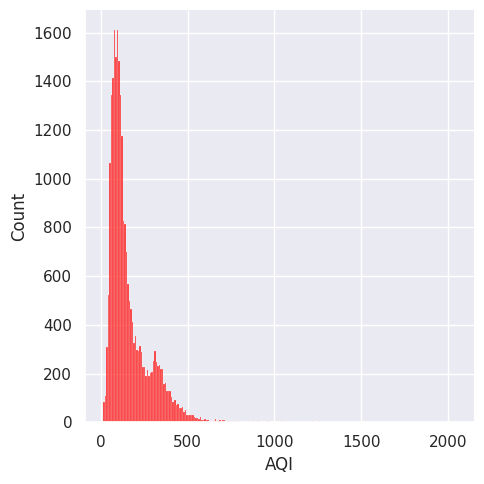

In [ ]:
sns.displot(df, x="AQI", color="red")
plt.show()

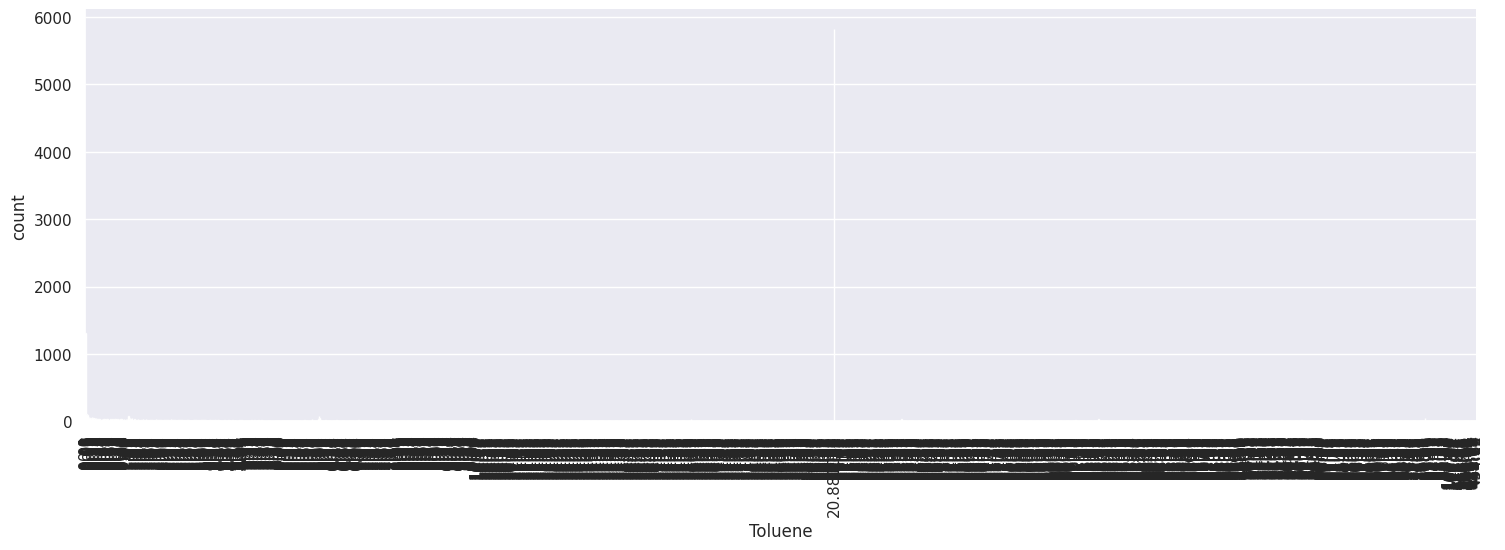

In [ ]:
sns.set(style="darkgrid")
graph=sns.catplot(x="Toluene", kind="count", data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

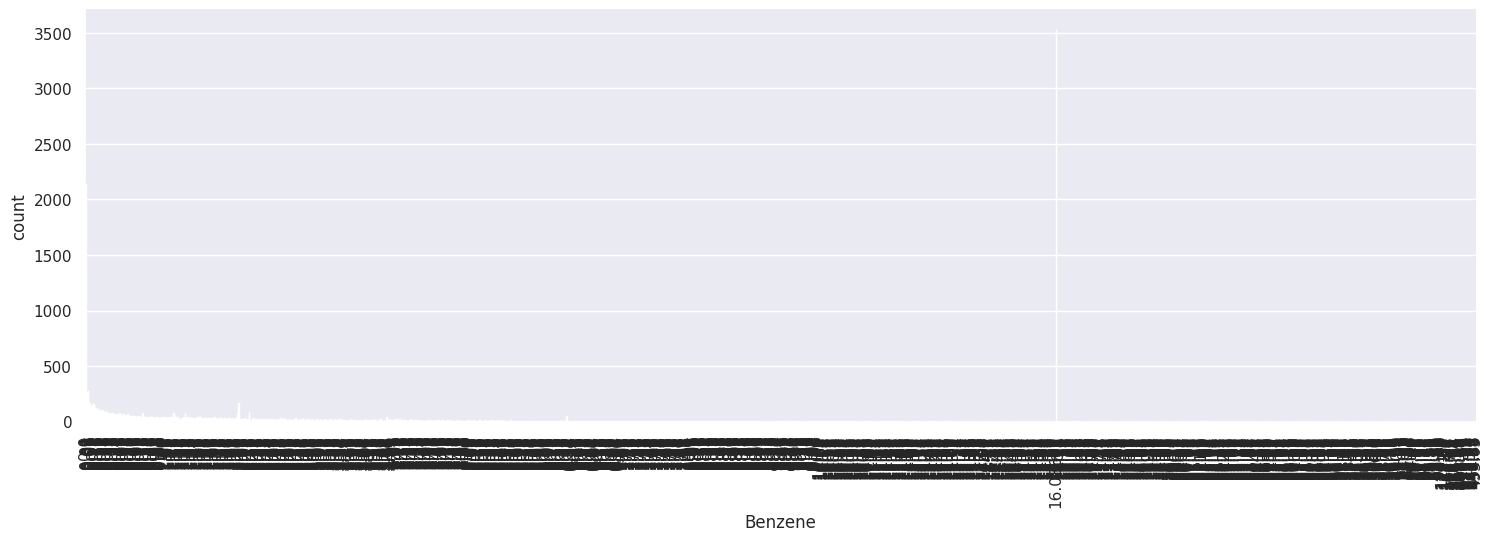

In [ ]:
sns.set(style="darkgrid")
graph=sns.catplot(x="Benzene", kind="count", data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

In [ ]:
sns.set(style="darkgrid")
graph=sns.catplot(x="AQI", kind="count", data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

In [ ]:
sns.set(style="darkgrid")
graph=sns.catplot(x="O3", kind="count", data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

In [ ]:
sns.set(style="darkgrid")
graph=sns.catplot(x="CO", kind="count", data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

In [ ]:
sns.set(style="darkgrid")
graph=sns.catplot(x="SO2", kind="count", data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

In [ ]:
sns.set(style="darkgrid")
graph=sns.catplot(x="Xylene", kind="count", data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

In [ ]:
sns.set(style="darkgrid")
graph=sns.catplot(x="Xylene", kind="count", data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

In [ ]:
df1=df.drop(columns=['City'])

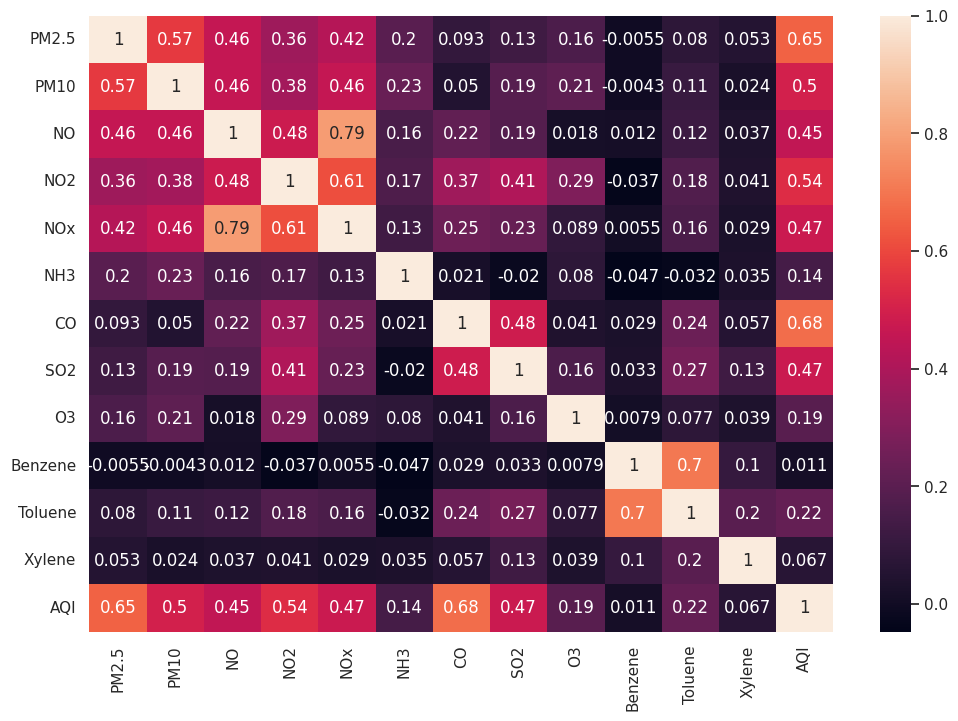

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [ ]:
df.drop(['City'], axis=1, inplace=True)

In [ ]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
x=df[["PM2.5", "PM10", "NO", "NO2", "NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y=df["AQI"]

In [ ]:
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
28,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14
29,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81
30,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67
31,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87
32,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61


In [ ]:
y.head()

,AQI
28,209.0
29,328.0
30,514.0
31,782.0
32,914.0


In [ ]:
X_train,X_test, Y_train, Y_test= train_test_split(x,y,test_size=0.2, random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(19880, 12) (4970, 12) (19880,) (4970,)


In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE trainingdata= ", str(RMSE_train))
print("RMSE testdata= ", str(RMSE_test))
print('-'*50)
print('RSquared value on train:', model.score(X_train, Y_train))
print('RSquared value on test:', model.score(X_test, Y_test))

RMSE trainingdata=  54.06554860355037
RMSE testdata=  56.52647438231923
--------------------------------------------------
RSquared value on train: 0.8518025517534087
RSquared value on test: 0.8408455813941085


In [ ]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
train_pred=KNN.predict(X_train)
test_pred=KNN.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE trainingdata= ", str(RMSE_train))
print("RMSE testdata= ", str(RMSE_test))
print('-'*50)
print('RSquared value on train:', KNN.score(X_train, Y_train))
print('RSquared value on test:', KNN.score(X_test, Y_test))

RMSE trainingdata=  40.09404161516059
RMSE testdata=  53.048606920229886
--------------------------------------------------
RSquared value on train: 0.9184997068042646
RSquared value on test: 0.8598274836049994


In [ ]:
DT = DecisionTreeRegressor()
DT.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
train_pred=DT.predict(X_train)
test_pred=DT.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE trainingdata= ", str(RMSE_train))
print("RMSE testdata= ", str(RMSE_test))
print('-'*50)
print('RSquared value on train:', DT.score(X_train, Y_train))
print('RSquared value on test:', DT.score(X_test, Y_test))

RMSE trainingdata=  3.3075244207629284
RMSE testdata=  60.951721100605155
--------------------------------------------------
RSquared value on train: 0.9994453671144884
RSquared value on test: 0.8149509544706381


In [ ]:
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
train_preds1=RF.predict(X_train)
test_preds1=RF.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE trainingdata= ", str(RMSE_train))
print("RMSE testdata= ", str(RMSE_test))
print('-'*50)
print('RSquared value on train:', RF.score(X_train, Y_train))
print('RSquared value on test:', RF.score(X_test, Y_test))

RMSE trainingdata=  40.09404161516059
RMSE testdata=  53.048606920229886
--------------------------------------------------
RSquared value on train: 0.9864431339636289
RSquared value on test: 0.8915086588353781
